# Activation in a custom layer

> In this post, we extend our knowledge of building custom layers by adding an activation parameter. The implementation is pretty straightforward as you'll see below. This is the summary of lecture "Custom Models, Layers and Loss functions with Tensorflow" from DeepLearning.AI.

- toc: true 
- badges: true
- comments: true
- author: Chanseok Kang
- categories: [Python, Coursera, Tensorflow, DeepLearining.AI]
- image: 

## Packages

In [1]:
import tensorflow as tf
from tensorflow.keras.layers import Layer
from tensorflow.keras.utils import plot_model

import numpy as np

## Prepare the Data

we'll use MNIST dataset.

In [2]:
# define the dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0

## Adding an activation layer

To use the built-in activations in Keras, we can specify an `activation` parameter in the `__init__()` method of our custom layer class. From there, we can initialize it by using the `tf.keras.activations.get()` method. This takes in a string identifier that corresponds to one of the [available activations](https://keras.io/api/layers/activations/#available-activations) in Keras. Next, you can now pass in the forward computation to this activation in the `call()` method.

In [3]:
class SimpleDense(Layer):
    # add an activation paramter
    def __init__(self, units=32, activation=None):
        super(SimpleDense, self).__init__()
        self.units = units
        
        # define the activation to get from the built-in activation layers in Keras
        self.activation = tf.keras.activations.get(activation)
        
    def build(self, input_shape):
        # initialize the weight
        w_init = tf.random_normal_initializer()
        self.w = tf.Variable(name='kernel',
                             initial_value=w_init(shape=(input_shape[-1], self.units)),
                             trainable=True)
        
        # intialize the bias
        b_init = tf.zeros_initializer()
        self.b = tf.Variable(name='bias',
                             initial_value=b_init(shape=(self.units, )),
                             trainable=True)
        
    def call(self, inputs):
        # pass the computation to the activation layer
        return self.activation(tf.matmul(inputs, self.w) + self.b)

We can now pass in an activation parameter to our custom layer. The string identifier is mostly the same as the function name so 'relu' below will get `tf.keras.activations.relu`.

In [4]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    SimpleDense(128, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

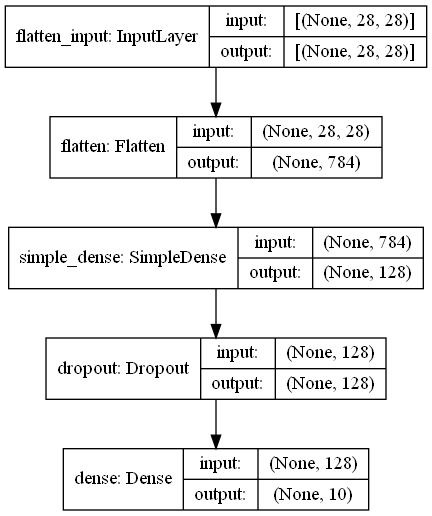

In [5]:
plot_model(model, show_shapes=True, show_layer_names=True, to_file='./model_simpleDense.png')

In [6]:
model.fit(X_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2996 - accuracy: 0.9140
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1410 - accuracy: 0.9569
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1088 - accuracy: 0.9671
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.9727
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0753 - accuracy: 0.9763


In [7]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0730 - accuracy: 0.9773


[0.07297606766223907, 0.9772999882698059]